In [ ]:
!pip install tensorflow keras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/Maruti_2011_to_2023.csv')

In [ ]:
# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df['Maruti_Close'].values.reshape(-1, 1)
data

array([[ 1290.61181641],
       [ 1293.05554199],
       [ 1278.30322266],
       ...,
       [10288.5       ],
       [10271.59960938],
       [10302.34960938]])

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Number of previous days to use for predicting the next day
X, y = create_sequences(data, seq_length)
X.shape, y.shape

((3144, 60, 1), (3144, 1))

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X[:,:,0])

In [ ]:
# Display X and y
#print("X shape:", X.shape)
#print("y shape:", y.shape)
#print("First sequence in X:\n", X[0])
#print("First target in y:\n", y[0])

X shape: (3144, 60, 1)
y shape: (3144, 1)
First sequence in X:
 [[0.04581803]
 [0.04606354]
 [0.04458147]
 [0.04107645]
 [0.03804425]
 [0.0367213 ]
 [0.03603486]
 [0.0359621 ]
 [0.0357712 ]
 [0.03160243]
 [0.03159331]
 [0.0323207 ]
 [0.03187518]
 [0.03065232]
 [0.02968851]
 [0.03367544]
 [0.03327992]
 [0.03160243]
 [0.02793374]
 [0.03007041]
 [0.02912024]
 [0.02681539]
 [0.02691996]
 [0.02371498]
 [0.02433324]
 [0.02315582]
 [0.02108279]
 [0.02162831]
 [0.0235695 ]
 [0.02745641]
 [0.028602  ]
 [0.02780643]
 [0.02781551]
 [0.02787464]
 [0.02593347]
 [0.02354676]
 [0.02458326]
 [0.02295122]
 [0.02241479]
 [0.02601074]
 [0.03351632]
 [0.03638034]
 [0.03545297]
 [0.03079777]
 [0.03037041]
 [0.03126603]
 [0.03175698]
 [0.02988855]
 [0.03044773]
 [0.02655171]
 [0.02701542]
 [0.02209202]
 [0.02128281]
 [0.01873701]
 [0.02271485]
 [0.02307851]
 [0.0222784 ]
 [0.02365587]
 [0.02541974]
 [0.02871565]]
First target in y:
 [0.03153877]


In [ ]:
# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = scaled_data[:train_size], scaled_data[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
y_train, y_test

(array([[1148.47741699],
        [1142.27832031],
        [1150.37817383],
        ...,
        [7019.66455078],
        [7008.3203125 ],
        [6957.46630859]]),
 array([[ 6815.75976562],
        [ 6805.98046875],
        [ 6747.83984375],
        [ 7105.28515625],
        [ 7268.8984375 ],
        [ 7361.56054688],
        [ 7480.43115234],
        [ 7428.84423828],
        [ 7322.49072266],
        [ 7350.26416016],
        [ 7417.25488281],
        [ 7406.9375    ],
        [ 7431.97363281],
        [ 7349.3359375 ],
        [ 7285.22998047],
        [ 7238.09277344],
        [ 7262.05273438],
        [ 7305.47412109],
        [ 7266.60009766],
        [ 7165.28320312],
        [ 7145.96826172],
        [ 7142.59472656],
        [ 7007.63525391],
        [ 7073.30615234],
        [ 7138.68261719],
        [ 7133.10839844],
        [ 7076.33740234],
        [ 7080.68945312],
        [ 7007.14648438],
        [ 6839.37744141],
        [ 6823.92626953],
        [ 6920.98876953],
   

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Use early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=32, epochs=25, callbacks=[early_stop])

Epoch 1/25
79/79 [==============================] - 7s 53ms/step - loss: 25414104.0000 - val_loss: 72327640.0000
Epoch 2/25
79/79 [==============================] - 3s 42ms/step - loss: 24877486.0000 - val_loss: 71012616.0000
Epoch 3/25
79/79 [==============================] - 3s 41ms/step - loss: 24063872.0000 - val_loss: 69120192.0000
Epoch 4/25
79/79 [==============================] - 3s 41ms/step - loss: 22982208.0000 - val_loss: 66656808.0000
Epoch 5/25
79/79 [==============================] - 3s 40ms/step - loss: 21669866.0000 - val_loss: 63761780.0000
Epoch 6/25
79/79 [==============================] - 4s 46ms/step - loss: 20179814.0000 - val_loss: 60443956.0000
Epoch 7/25
79/79 [==============================] - 4s 45ms/step - loss: 18573248.0000 - val_loss: 56838504.0000
Epoch 8/25
79/79 [==============================] - 3s 39ms/step - loss: 16914942.0000 - val_loss: 53035876.0000
Epoch 9/25
79/79 [==============================] - 3s 44ms/step - loss: 15271675.0000 - val_los

In [ ]:
# Make predictions
predictions = model.predict(X_test)
#predictions = scaler.inverse_transform(predictions)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions

20/20 [==============================] - 1s 14ms/step


array([[4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],
       [4303.9873],


In [ ]:
# Calculate accuracy metrics

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
msre = np.mean(((y_test - predictions) / y_test) ** 2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("Mean Squared Relative Error (MSRE):", msre)

Mean Squared Error (MSE): 18738194.1064009
Root Mean Squared Error (RMSE): 4328.763577096917
Mean Absolute Error (MAE): 4187.864952584708
Mean Squared Relative Error (MSRE): 0.23993144719169793


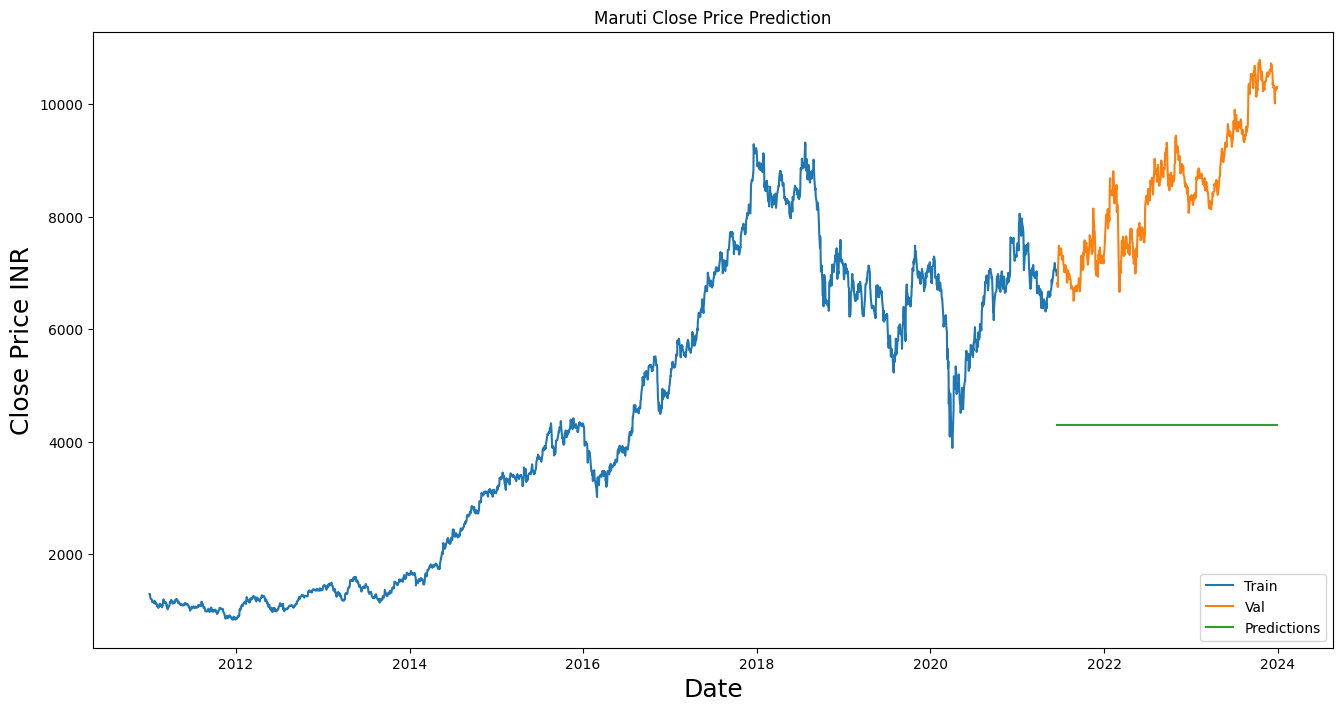

In [ ]:
# Visualize the results
train = df[:train_size + seq_length]
valid = df[train_size + seq_length:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Maruti Close Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Maruti_Close'])
plt.plot(valid[['Maruti_Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Forecast the next 10 days
last_sequence = scaled_data[-seq_length:]
forecast = []

for _ in range(10):
    pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

print("Next 10 day forecast of Maruti_Close:")
print(forecast)

1/1 [==============================] - 0s 27ms/step
Next 10 day forecast of Maruti_Close:
[[10252.929]
 [10276.344]
 [10294.933]
 [10311.151]
 [10326.126]
 [10340.354]
 [10354.033]
 [10367.238]
 [10379.974]
 [10392.244]]


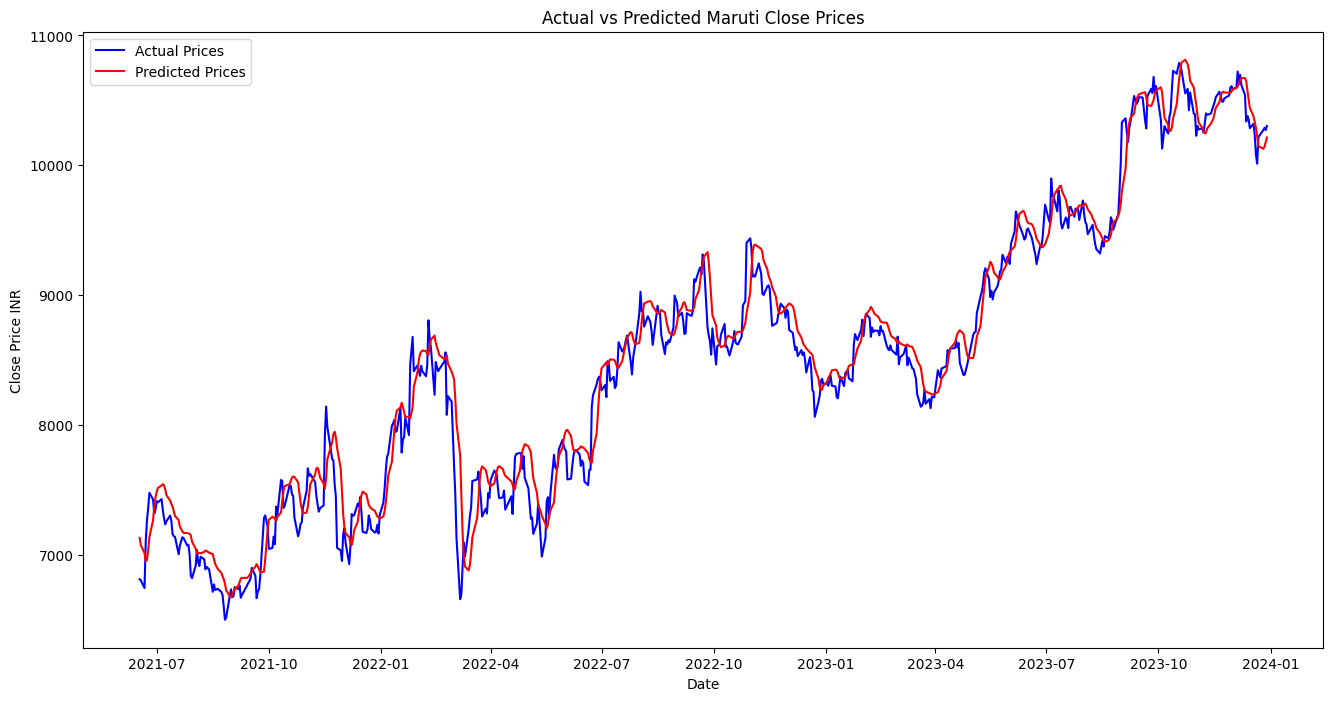

In [ ]:
# Plot the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(y_test):], y_test_scaled, color='blue', label='Actual Prices')
plt.plot(df.index[-len(y_test):], predictions, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Maruti Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend()
plt.show()

Epoch 1/100
79/79 [==============================] - 13s 115ms/step - loss: 0.1506 - val_loss: 0.0790
Epoch 2/100
79/79 [==============================] - 7s 86ms/step - loss: 0.0561 - val_loss: 0.0371
Epoch 3/100
79/79 [==============================] - 8s 104ms/step - loss: 0.0311 - val_loss: 0.0268
Epoch 4/100
79/79 [==============================] - 10s 128ms/step - loss: 0.0196 - val_loss: 0.0151
Epoch 5/100
79/79 [==============================] - 8s 102ms/step - loss: 0.0133 - val_loss: 0.0092
Epoch 6/100
79/79 [==============================] - 8s 104ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 7/100
79/79 [==============================] - 7s 85ms/step - loss: 0.0074 - val_loss: 0.0052
Epoch 8/100
79/79 [==============================] - 8s 102ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/100
79/79 [==============================] - 7s 85ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 10/100
79/79 [==============================] - 8s 108ms/step - loss: 0.0047 - val_los

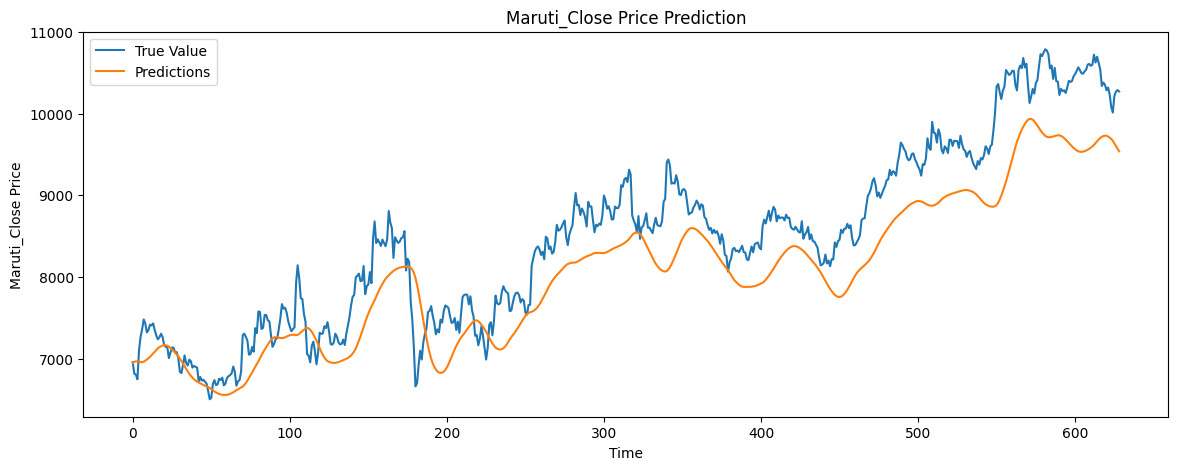

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Load the dataset
df = pd.read_csv('/content/Maruti_2011_to_2023.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering
df['Open_Close'] = df['Maruti_Open'] #/ df['Maruti_Close']
df['High_Low'] = df['Maruti_High'] - df['Maruti_Low']

# Preprocessing
data = df[['Maruti_Close', 'Open_Close', 'High_Low']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # Only predict the closing price
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 3), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Use early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=32, epochs=100, callbacks=[early_stop])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.column_stack((predictions, np.zeros_like(predictions), np.zeros_like(predictions))))[:, 0]
y_test_scaled = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test), np.zeros_like(y_test))))[:, 0]

# Calculate accuracy metrics
mse = mean_squared_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled, predictions)
msre = np.mean(((y_test_scaled - predictions) / y_test_scaled) ** 2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("Mean Squared Relative Error (MSRE):", msre)

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled, label='True Value')
plt.plot(predictions, label='Predictions')
plt.title('Maruti_Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Maruti_Close Price')
plt.legend()
plt.show()
